### Student Information
Name:謝佳峻   

Student ID:112033640

GitHub ID: gary3231

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# 1.take home exercice 
 You may need to copy some cells from the Lab notebook to this notebook.

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes.

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../DM2023-Lab1-Master-main")
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
import helpers.data_mining_helpers as dmh

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


In [2]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [3]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [4]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [5]:
X['category'].loc[lambda s: s>2] # show those categories bigger than 2

2       3
3       3
4       3
5       3
6       3
       ..
2229    3
2230    3
2246    3
2247    3
2249    3
Name: category, Length: 599, dtype: int64

In [6]:
X.where(X.loc[:,'category']>2,0) # find category bigger than 2, and replace other with 0

,text,category,category_name
0,0,0,0
1,0,0,0
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,0,0,0
2253,0,0,0
2254,0,0,0
2255,0,0,0


In [7]:
X.query('category >2') # show data where category bigger than 2

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
#answer here
#No code and explain is below

isnull() is a function finding mising value

In pandas,nan and None are mising value, but string is not.

Index C,D,F are string, so they are not mising value.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


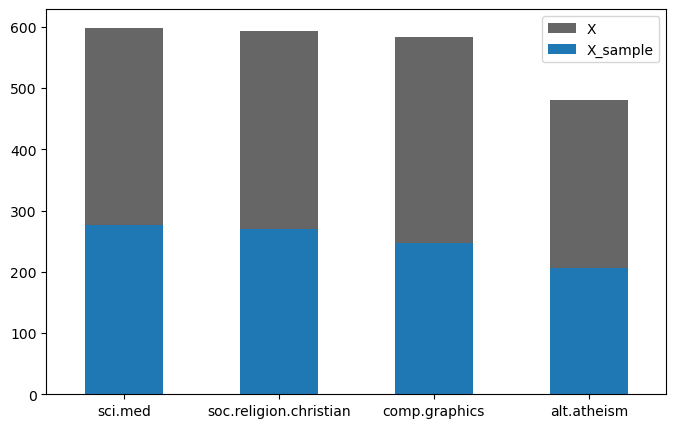

In [12]:
from matplotlib import pyplot as plt
# compare original data to X_sample with random_state=42

#original data
X.category_name.value_counts().plot(kind='bar',color = (0.4,0.4,0.4),rot=0)

#X_sample with random_state=42
X_sample.category_name.value_counts().plot(kind='bar',rot=0,figsize= (8,5))

plt.legend(["X","X_sample"]) 


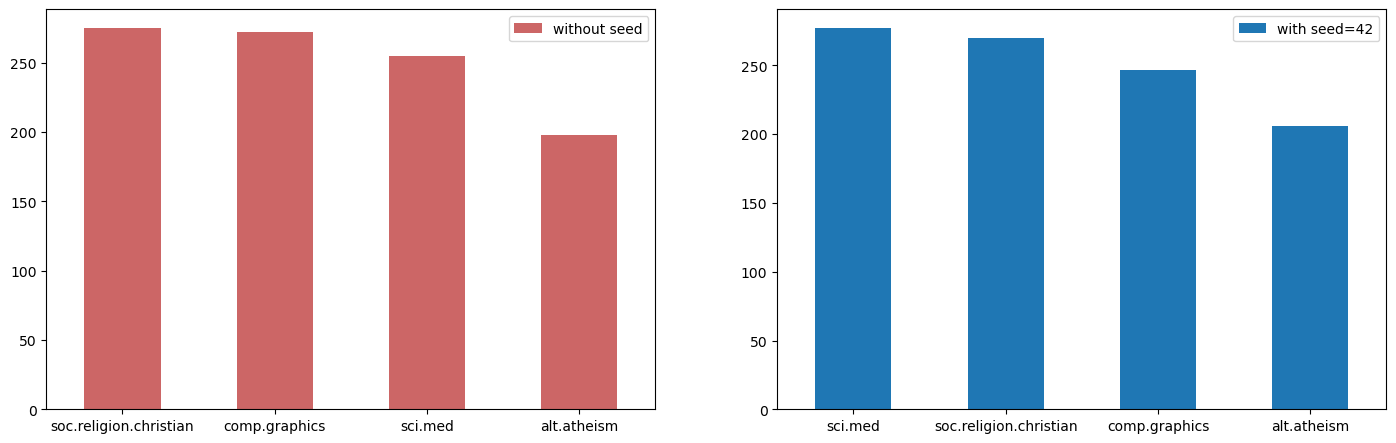

In [13]:
# compare data without random_state to data with random_state=42

#data without random_state
X_sample_ran = X.sample(n=1000)
plt.subplot(121)
X_sample_ran.category_name.value_counts().plot(kind='bar',color = (0.8,0.4,0.4),rot=0,figsize= (8,5))
plt.legend(["without seed"])

#data with random_state=42
plt.subplot(122)
X_sample.category_name.value_counts().plot(kind='bar',rot=0,figsize= (8,5))
plt.legend(["with seed=42"])

# adjust figure size
plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)

from above two result

first result can find sample (random data) is smallar than original data, and each frequency of category from sample is about half of original one.

second result compare the sample with random_state or not.

I try about 20 times, find data without random_state data will change when code run .

But both of them category alt.atheism is about 200. sci.med, comp.graphics and soc.religion.christian are about 250. Their distribution look simaliar.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

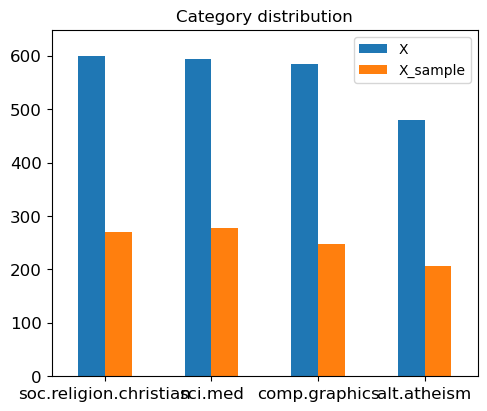

In [14]:
upper_bound=max(X.category_name.value_counts()+50)
pd.concat({'One': X.category_name.value_counts(), 'Two': X_sample.category_name.value_counts()}, axis=1).plot(kind = 'bar',
                                                                                                              title = 'Category distribution',
                                                                                                              ylim=[0,upper_bound],
                                                                                                              rot=0,
                                                                                                              fontsize=12,
                                                                                                              figsize= (5.5,4.5))

plt.legend(["X","X_sample"]) 


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\530\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [17]:
rows,cols = np.where(X_counts[0:5, 0:100].toarray()==1)#use np.where to find where is 1
count_vect.get_feature_names_out()[cols] #show word tern where is 1

#below show all word term where is 1 in X_counts[0:5, 0:100]
#the second one '01' is answer
print('index is :' ,cols[1])
count_vect.get_feature_names_out()[cols][1]


index is : 37


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [18]:
import seaborn as sns



,term_03051,term_0391,term_0410,term_1013,term_11705,term_1191,term_1200,term_1268,term_134802,term_13800,...,term_27103,term_28397,term_302,term_32,term_3551342,term_3659,term_3893,term_3998,term_3w4,term_436
doc_0,0,0,0,1,1,0,2,0,0,0,...,0,0,2,2,1,0,0,1,0,0
doc_1,0,4,0,0,5,1,0,3,3,8,...,1,0,1,0,0,0,0,0,8,0
doc_34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_37,0,1,0,0,0,0,1,0,0,0,...,0,0,0,4,0,0,0,0,0,0
doc_102,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_103,0,1,0,0,0,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_124,0,8,0,0,1,2,2,0,0,0,...,0,0,1,0,1,0,0,0,0,3
doc_177,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
doc_242,0,16,0,1,6,15,13,0,0,2,...,19,0,6,0,3,0,3,0,0,1


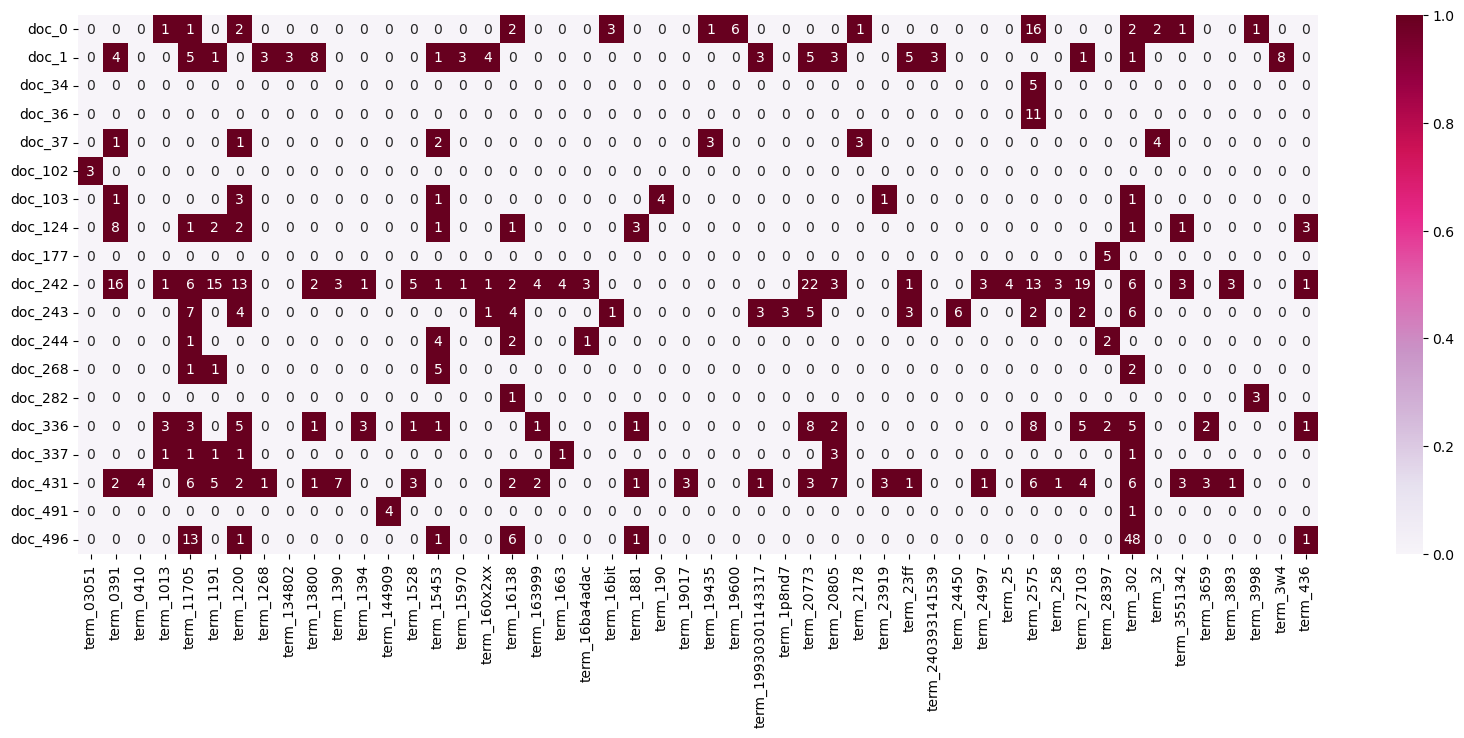

In [19]:
#answer here
#I want to find where is bigger than 2 for 500 document
idx_arg = np.argwhere(X_counts[:,:500].toarray()>2) # find where is bigger than 2
idx_arg_x = np.unique(idx_arg[:,0])  #to make unique elements of an array
idx_arg_y = (np.unique(idx_arg[:,1]))

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[idx_arg_x]]

plot_y = ["doc_"+ str(i) for i in np.array((X.index))[idx_arg_y]]
plot_z = np.array([[X_counts[i:i+1,j:j+1].toarray()[0,0]for i in idx_arg_x] for j in idx_arg_y])#X_counts cannot for specific index, I just can use this method to let it can get specific index 
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

display(df_todraw)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)



### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

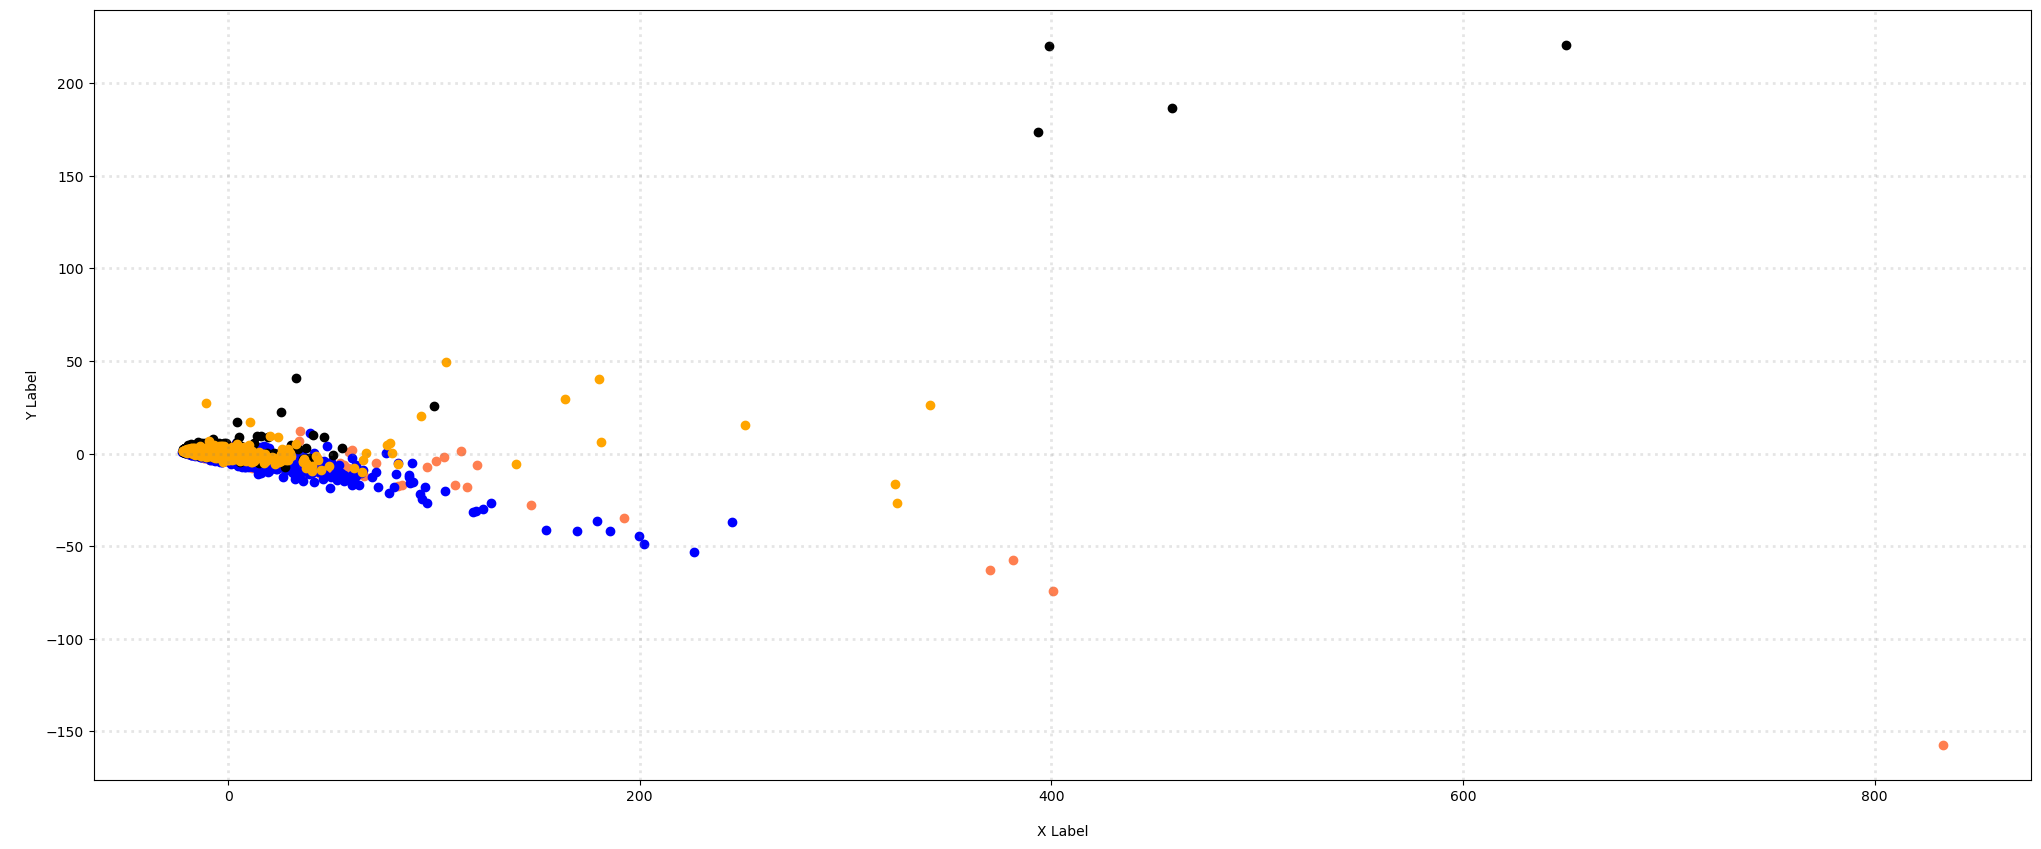

In [20]:
from sklearn.decomposition import PCA

#here is 2D plot

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

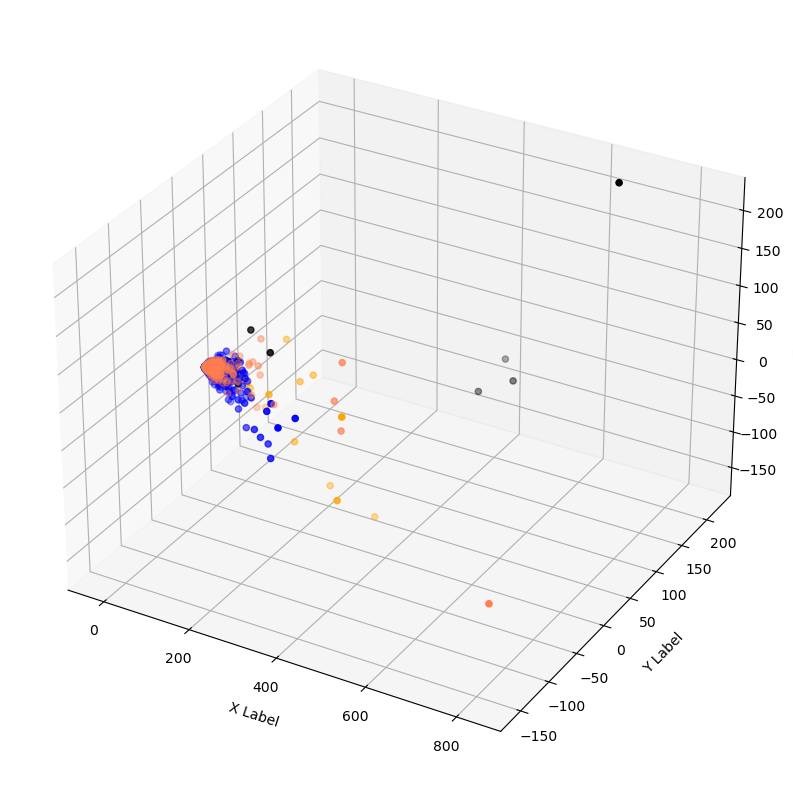

In [21]:
#  here is 3D plot

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

From 2D and 3D figure above, we can find some points are close in 2D but in 3D are not. 

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [22]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


35788


[Text(0, 0, 'for'),
 Text(1, 0, 'you'),
 Text(2, 0, 'and'),
 Text(3, 0, 'the'),
 Text(4, 0, 'of'),
 Text(5, 0, 'it'),
 Text(6, 0, 'in'),
 Text(7, 0, 'is'),
 Text(8, 0, 'to'),
 Text(9, 0, 'that')]

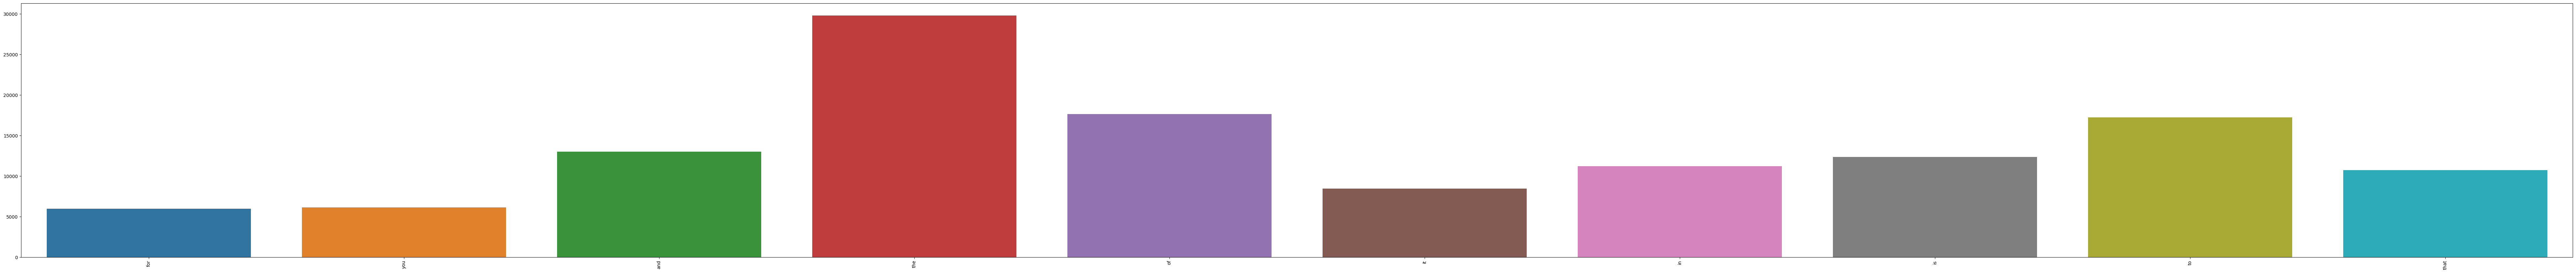

In [23]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
ind = np.argpartition(term_frequencies,-10)[-10:] #to get 10 bigest elements from array
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[ind], 
            y=term_frequencies[ind])
g.set_xticklabels(count_vect.get_feature_names_out()[ind], rotation = 90)

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


[Text(0, 0, 'about'),
 Text(1, 0, 'all'),
 Text(2, 0, 'an'),
 Text(3, 0, 'and'),
 Text(4, 0, 'are'),
 Text(5, 0, 'as'),
 Text(6, 0, 'at'),
 Text(7, 0, 'be'),
 Text(8, 0, 'but'),
 Text(9, 0, 'by'),
 Text(10, 0, 'can'),
 Text(11, 0, 'com'),
 Text(12, 0, 'do'),
 Text(13, 0, 'edu'),
 Text(14, 0, 'for'),
 Text(15, 0, 'from'),
 Text(16, 0, 'god'),
 Text(17, 0, 'have'),
 Text(18, 0, 'he'),
 Text(19, 0, 'if'),
 Text(20, 0, 'in'),
 Text(21, 0, 'is'),
 Text(22, 0, 'it'),
 Text(23, 0, 'lines'),
 Text(24, 0, 'my'),
 Text(25, 0, 'not'),
 Text(26, 0, 'of'),
 Text(27, 0, 'on'),
 Text(28, 0, 'one'),
 Text(29, 0, 'or'),
 Text(30, 0, 'organization'),
 Text(31, 0, 're'),
 Text(32, 0, 'subject'),
 Text(33, 0, 'that'),
 Text(34, 0, 'the'),
 Text(35, 0, 'there'),
 Text(36, 0, 'they'),
 Text(37, 0, 'this'),
 Text(38, 0, 'to'),
 Text(39, 0, 'was'),
 Text(40, 0, 'we'),
 Text(41, 0, 'what'),
 Text(42, 0, 'with'),
 Text(43, 0, 'you')]

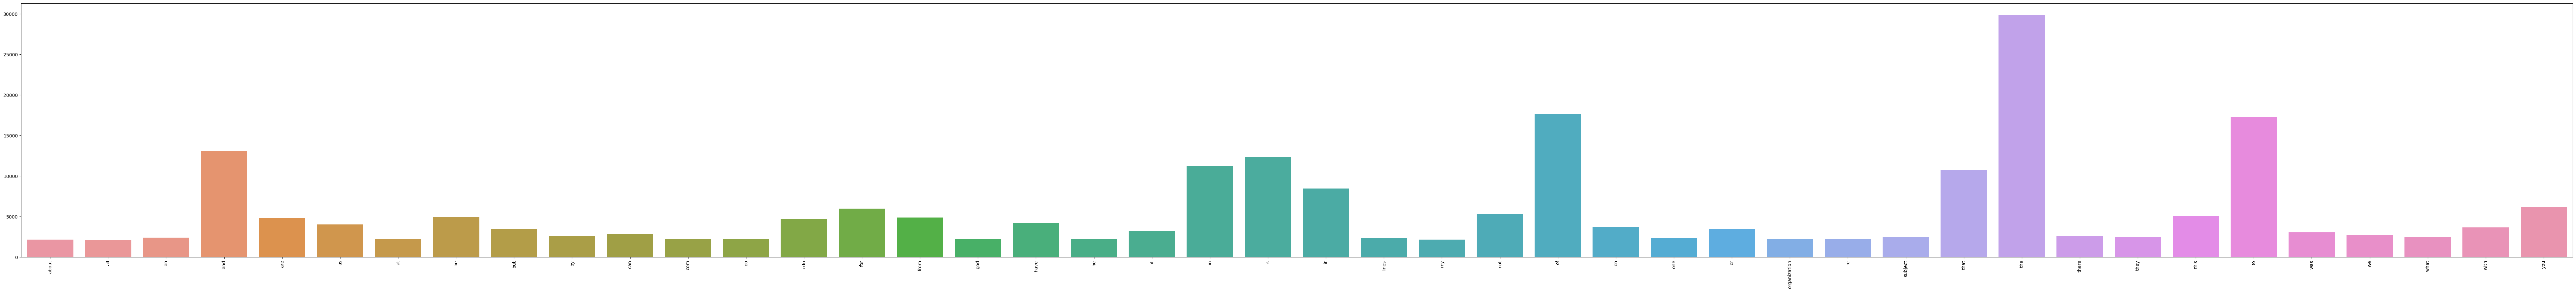

In [24]:
ind = np.where(term_frequencies>2000) # find where are more than 2000
ind = ind[:100]   #get 100 datas where are more than 2000
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[ind], #plot new data set 
            y=term_frequencies[ind])
g.set_xticklabels(count_vect.get_feature_names_out()[ind], rotation = 90)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[Text(0, 0, 'the'),
 Text(1, 0, 'of'),
 Text(2, 0, 'to'),
 Text(3, 0, 'and'),
 Text(4, 0, 'is'),
 Text(5, 0, 'in'),
 Text(6, 0, 'that'),
 Text(7, 0, 'it'),
 Text(8, 0, 'you'),
 Text(9, 0, 'for'),
 Text(10, 0, 'not'),
 Text(11, 0, 'this'),
 Text(12, 0, 'be'),
 Text(13, 0, 'from'),
 Text(14, 0, 'are'),
 Text(15, 0, 'edu'),
 Text(16, 0, 'have'),
 Text(17, 0, 'as'),
 Text(18, 0, 'on'),
 Text(19, 0, 'with'),
 Text(20, 0, 'but'),
 Text(21, 0, 'or'),
 Text(22, 0, 'if'),
 Text(23, 0, 'was'),
 Text(24, 0, 'can'),
 Text(25, 0, 'we'),
 Text(26, 0, 'there'),
 Text(27, 0, 'by'),
 Text(28, 0, 'what'),
 Text(29, 0, 'subject'),
 Text(30, 0, 'they'),
 Text(31, 0, 'an'),
 Text(32, 0, 'lines'),
 Text(33, 0, 'one'),
 Text(34, 0, 'he'),
 Text(35, 0, 'god'),
 Text(36, 0, 'do'),
 Text(37, 0, 'organization'),
 Text(38, 0, 'at'),
 Text(39, 0, 're'),
 Text(40, 0, 'com'),
 Text(41, 0, 'about'),
 Text(42, 0, 'my'),
 Text(43, 0, 'all'),
 Text(44, 0, 'would'),
 Text(45, 0, 'will'),
 Text(46, 0, 'so'),
 Text(47, 0, 

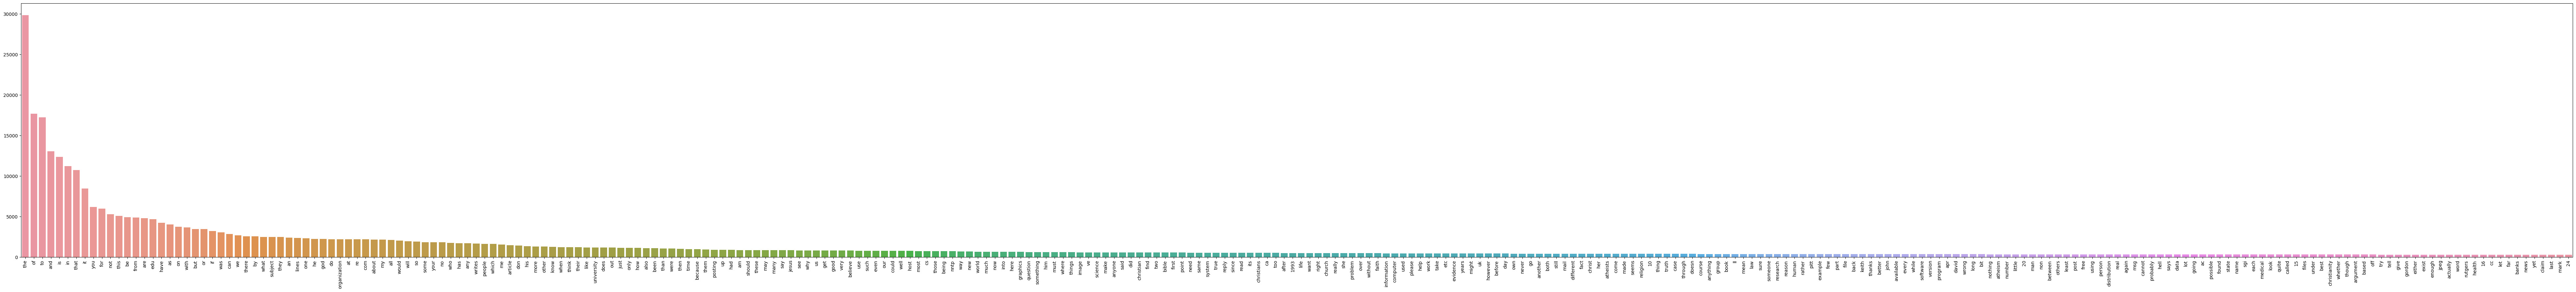

In [25]:
ind_sort = np.argsort(-term_frequencies)#sort data and get sorted index 
ind_sort = ind_sort[:300]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[ind_sort], 
            y=term_frequencies[ind_sort])
g.set_xticklabels(count_vect.get_feature_names_out()[ind_sort], rotation = 90)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [27]:
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


we can see above table. Generate the binarization using the `category_name` column instead can work. 

# 2. follow the same process from DM2023-Lab1-Master on the new data

## 1. The Data
ignore

## 2. Data Preparation

In [28]:
# sys.path.append('../sentiment_labelled_sentences')

obj = ['sentence','score']
#load three data
amazon_cells = pd.read_table("../sentiment_labelled_sentences/amazon_cells_labelled.txt",header=None,names=obj)
imdb = pd.read_table("../sentiment_labelled_sentences/imdb_labelled.txt",header=None,names=obj)
yelp = pd.read_table("../sentiment_labelled_sentences/yelp_labelled.txt",header=None,names=obj)

amazon_cells['company'] = 'amazon'
imdb['company'] = 'imdb'
yelp['company'] = 'yelp'

#combine three data
sentiment = pd.concat((amazon_cells,imdb,yelp),0)
#shuffle data
sentiment=sentiment.sample(frac=1).reset_index(drop=True)


C:\Users\530\AppData\Local\Temp\ipykernel_22488\2196799337.py:14: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sentiment = pd.concat((amazon_cells,imdb,yelp),0)


In [29]:
sentiment[0:2]

,sentence,score,company
0,They keep getting better and better (this is m...,1,amazon
1,I would definitely recommend the wings as well...,1,yelp


In [30]:
len(sentiment)

2748

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [31]:
for t in sentiment["sentence"][:3]:
    print(t)

They keep getting better and better (this is my third one and I've had numerous Palms too).
I would definitely recommend the wings as well as the pizza.
I was looking for this headset for a long time and now that I've got it I couldn't be happier.


In [32]:
sentiment[0:10]

,sentence,score,company
0,They keep getting better and better (this is m...,1,amazon
1,I would definitely recommend the wings as well...,1,yelp
2,I was looking for this headset for a long time...,1,amazon
3,Any ring tone..Overall good phone to buy..,1,amazon
4,I knew when I saw the film that more great thi...,1,imdb
5,The sound quality is good and functionality is...,1,amazon
6,Good beer & drink selection and good food sele...,1,yelp
7,"If you see it, you should probably just leave ...",0,imdb
8,":) Anyway, the plot flowed smoothly and the ma...",1,imdb
9,Think of the film being like a dream.,1,imdb


### 3.2 Familiarizing yourself with the Data

In [33]:
# a simple query
sentiment[:10][["sentence"]]

,sentence
0,They keep getting better and better (this is m...
1,I would definitely recommend the wings as well...
2,I was looking for this headset for a long time...
3,Any ring tone..Overall good phone to buy..
4,I knew when I saw the film that more great thi...
5,The sound quality is good and functionality is...
6,Good beer & drink selection and good food sele...
7,"If you see it, you should probably just leave ..."
8,":) Anyway, the plot flowed smoothly and the ma..."
9,Think of the film being like a dream.


In [34]:
sentiment[-10:]

,sentence,score,company
2738,"The acting was decidely wooden, though no wors...",0,imdb
2739,Will not be back!,0,yelp
2740,It's also great to see that renowned silent sc...,1,imdb
2741,It is so small and you don't even realize that...,1,amazon
2742,The movie is full of wonderful dancing (hence ...,1,imdb
2743,I dont think I will be back for a very long time.,0,yelp
2744,Final Word: This Show is a real torture!!,0,imdb
2745,It was just not a fun experience.,1,yelp
2746,The memories are murky but I can only say that...,1,imdb
2747,Horrible!,0,imdb


In [35]:
sentiment.loc[:10, 'sentence']

0     They keep getting better and better (this is m...
1     I would definitely recommend the wings as well...
2     I was looking for this headset for a long time...
3            Any ring tone..Overall good phone to buy..
4     I knew when I saw the film that more great thi...
5     The sound quality is good and functionality is...
6     Good beer & drink selection and good food sele...
7     If you see it, you should probably just leave ...
8     :) Anyway, the plot flowed smoothly and the ma...
9               Think of the film being like a dream.  
10    Gotta love those close-ups of slimy, drooling ...
Name: sentence, dtype: object

In [36]:
sentiment.iloc[:10, 0]

0    They keep getting better and better (this is m...
1    I would definitely recommend the wings as well...
2    I was looking for this headset for a long time...
3           Any ring tone..Overall good phone to buy..
4    I knew when I saw the film that more great thi...
5    The sound quality is good and functionality is...
6    Good beer & drink selection and good food sele...
7    If you see it, you should probably just leave ...
8    :) Anyway, the plot flowed smoothly and the ma...
9              Think of the film being like a dream.  
Name: sentence, dtype: object

### ** >>> Exercise 2 (take home):** 

In [37]:
sentiment['score'].loc[lambda s: s==1] # show those scores are 1 

0       1
1       1
2       1
3       1
4       1
       ..
2740    1
2741    1
2742    1
2745    1
2746    1
Name: score, Length: 1386, dtype: int64

In [38]:
sentiment.where(sentiment.loc[:,'score']==1,-1) # find score is 1, and replace other with -1

,sentence,score,company
0,They keep getting better and better (this is m...,1,amazon
1,I would definitely recommend the wings as well...,1,yelp
2,I was looking for this headset for a long time...,1,amazon
3,Any ring tone..Overall good phone to buy..,1,amazon
4,I knew when I saw the film that more great thi...,1,imdb
...,...,...,...
2743,-1,-1,-1
2744,-1,-1,-1
2745,It was just not a fun experience.,1,yelp
2746,The memories are murky but I can only say that...,1,imdb


In [39]:
sentiment.query('score ==0') # show data where score is 0

,sentence,score,company
7,"If you see it, you should probably just leave ...",0,imdb
11,Soggy and not good.,0,yelp
12,"Similarly, the delivery man did not say a word...",0,yelp
13,The WORST EXPERIENCE EVER.,0,yelp
16,Bland and flavorless is a good way of describi...,0,yelp
...,...,...,...
2738,"The acting was decidely wooden, though no wors...",0,imdb
2739,Will not be back!,0,yelp
2743,I dont think I will be back for a very long time.,0,yelp
2744,Final Word: This Show is a real torture!!,0,imdb


## 4. Data Mining using Pandas

In [40]:
sentiment.isnull()

,sentence,score,company
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [41]:
sentiment.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [42]:
#create dummy series and add it to sentiment
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])
dummy_series.to_frame().T
result_with_series = pd.concat([sentiment, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

2749

In [43]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [44]:
dummy_dict = [{'sentence': 'dummy_record'
              }]
sentiment = pd.concat([sentiment, pd.DataFrame(dummy_dict)], ignore_index=True)
len(sentiment)

2749

In [45]:
sentiment.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,1


In [46]:
sentiment.dropna(inplace=True)
sentiment.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [47]:
len(sentiment)

2748

### 4.2 Dealing with Duplicate Data

In [48]:
sentiment.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [49]:
sum(sentiment.duplicated())

17

In [50]:
sum(sentiment.duplicated('sentence'))

17

In [51]:
duplicateLines = sentiment[sentiment.duplicated()]
print(duplicateLines)

                                               sentence  score company
299                    Definitely worth checking out.      1.0    imdb
717                                             10/10      1.0    imdb
823                                    I won't be back.    0.0    yelp
1161                                       Works great.    1.0  amazon
1446                              This is a great deal.    1.0  amazon
1483                                      Great phone!.    1.0  amazon
1562  If you like a loud buzzing to override all you...    0.0  amazon
1614                             The food was terrible.    0.0    yelp
1665                                       Great phone.    1.0  amazon
1682                                       Great Phone.    1.0  amazon
1881                                      Does not fit.    0.0  amazon
1936                                 I love this place.    1.0    yelp
1969                  I would not recommend this place.    0.0    yelp
2052  

In [52]:
sentiment.drop_duplicates(keep=False, inplace=True)

In [53]:
len(sentiment)

2714

## 5.  Data Preprocessing

### 5.1 Sampling

In [54]:
print(sentiment.shape)
sentiment_sample = sentiment.sample(n=1000,random_state=42) #random state
display(sentiment_sample)

(2714, 3)


,sentence,score,company
512,"Good service, very clean, and inexpensive, to ...",1.0,yelp
2043,I exchanged the sony ericson z500a for this an...,1.0,amazon
1933,"I have had this phone for over a year now, and...",0.0,amazon
942,Don't waste your $$$ on this one.,0.0,amazon
2711,It doesn't make you look cool.,0.0,amazon
...,...,...,...
1309,An Awesome New Look For Fall 2000!.,1.0,amazon
1952,.... Item arrived quickly and works great with...,1.0,amazon
1012,Maybe if they weren't cold they would have bee...,0.0,yelp
1105,"I have only had it for a few weeks, but so far...",1.0,amazon


In [55]:
len(sentiment_sample)

1000

In [56]:
sentiment_sample[0:4]

,sentence,score,company
512,"Good service, very clean, and inexpensive, to ...",1.0,yelp
2043,I exchanged the sony ericson z500a for this an...,1.0,amazon
1933,"I have had this phone for over a year now, and...",0.0,amazon
942,Don't waste your $$$ on this one.,0.0,amazon


In [57]:
print(sentiment.company.value_counts())

yelp      992
amazon    980
imdb      742
Name: company, dtype: int64


<Axes: title={'center': 'company distribution'}>

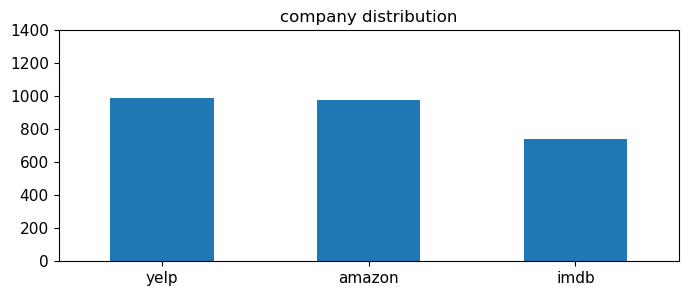

In [58]:
sentiment.company.value_counts().plot(kind = 'bar',
                                    title = 'company distribution',
                                    ylim = [0, 1400],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8 (take home):** 

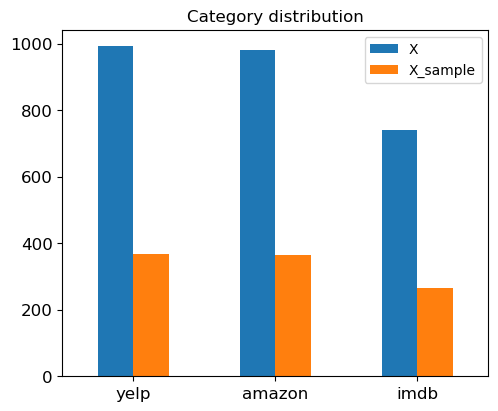

In [59]:
upper_bound=max(sentiment.company.value_counts()+50)
pd.concat({'One':sentiment.company.value_counts(), 'Two': sentiment_sample.company.value_counts()}, axis=1).plot(kind = 'bar',
                                                                                                              title = 'Category distribution',
                                                                                                              ylim=[0,upper_bound],
                                                                                                              rot=0,
                                                                                                              fontsize=12,
                                                                                                              figsize= (5.5,4.5))

plt.legend(["X","X_sample"]) 

### 5.2 Feature Creation

In [60]:
sentiment['unigrams'] = sentiment['sentence'].apply(lambda x: dmh.tokenize_text(x))
sentiment[0:4]["unigrams"]

0    [They, keep, getting, better, and, better, (, ...
1    [I, would, definitely, recommend, the, wings, ...
2    [I, was, looking, for, this, headset, for, a, ...
3    [Any, ring, tone, .., Overall, good, phone, to...
Name: unigrams, dtype: object

In [61]:
sentiment[0:4]

,sentence,score,company,unigrams
0,They keep getting better and better (this is m...,1.0,amazon,"[They, keep, getting, better, and, better, (, ..."
1,I would definitely recommend the wings as well...,1.0,yelp,"[I, would, definitely, recommend, the, wings, ..."
2,I was looking for this headset for a long time...,1.0,amazon,"[I, was, looking, for, this, headset, for, a, ..."
3,Any ring tone..Overall good phone to buy..,1.0,amazon,"[Any, ring, tone, .., Overall, good, phone, to..."


In [62]:
list(sentiment[0:1]['unigrams'])

[['They',
  'keep',
  'getting',
  'better',
  'and',
  'better',
  '(',
  'this',
  'is',
  'my',
  'third',
  'one',
  'and',
  'I',
  "'ve",
  'had',
  'numerous',
  'Palms',
  'too',
  ')',
  '.']]

### 5.3 Feature subset selection

In [63]:
count_vect_new = CountVectorizer()
sentiment_counts = count_vect_new.fit_transform(sentiment.sentence) #learn the vocabulary and return document-term matrix
print(sentiment_counts.shape)
print(sentiment_counts[0])

(2714, 5153)
  (0, 4546)	1
  (0, 2500)	1
  (0, 1955)	1
  (0, 467)	2
  (0, 216)	2
  (0, 4556)	1
  (0, 2426)	1
  (0, 2981)	1
  (0, 4554)	1
  (0, 3123)	1
  (0, 4865)	1
  (0, 2066)	1
  (0, 3076)	1
  (0, 3226)	1
  (0, 4627)	1


In [64]:
count_vect_new.get_feature_names_out()[4000]

'seuss'

In [65]:
count_vect_new.get_feature_names_out()[3652]

'recurring'

In [66]:
analyze = count_vect_new.build_analyzer()
analyze(sentiment.sentence[0])

['they',
 'keep',
 'getting',
 'better',
 'and',
 'better',
 'this',
 'is',
 'my',
 'third',
 'one',
 'and',
 've',
 'had',
 'numerous',
 'palms',
 'too']

In [67]:
analyze(" ".join(list(sentiment[:1].sentence)))

['they',
 'keep',
 'getting',
 'better',
 'and',
 'better',
 'this',
 'is',
 'my',
 'third',
 'one',
 'and',
 've',
 'had',
 'numerous',
 'palms',
 'too']

In [68]:
sentiment_counts.shape

(2714, 5153)

In [69]:
count_vect_new.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [70]:
sentiment_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [71]:
count_vect_new.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [72]:
plot_x = ["term_"+str(i) for i in count_vect_new.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [73]:
plot_y = ["doc_"+ str(i) for i in list(sentiment.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [74]:
plot_z = sentiment_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


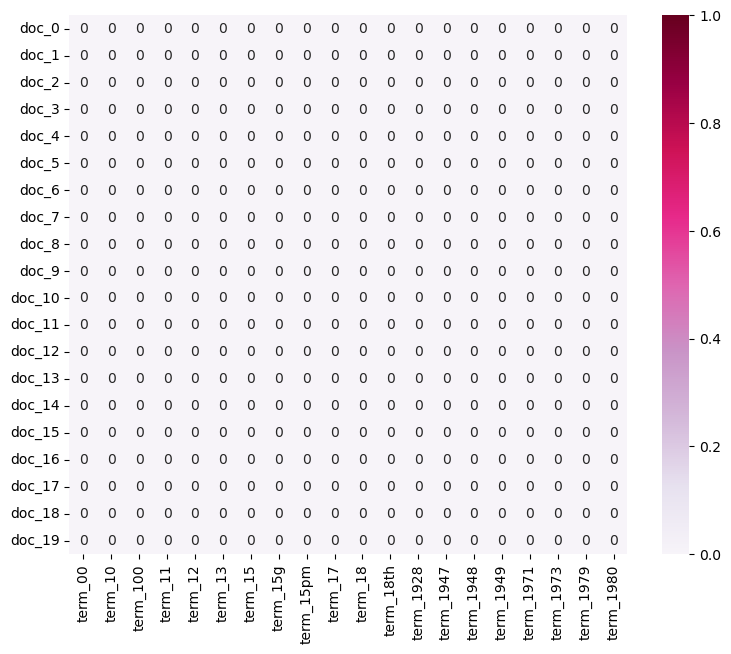

In [75]:
import seaborn as sns

df_todraw_new = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw_new)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw_new,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 

,term_africa,term_also,term_below,term_boost,term_brunch,term_burton,term_cod,term_control,term_corny,term_couldnt,...,term_flavors,term_give,term_groups,term_hard,term_hat,term_humor,term_layers,term_letdown,term_liking,term_loosely
doc_1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
doc_76,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,9
doc_117,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,4
doc_160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
doc_183,0,1,3,0,0,0,1,0,1,0,...,2,0,0,1,0,0,0,0,0,5
doc_205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
doc_218,0,0,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
doc_220,3,3,10,3,3,3,8,3,4,1,...,7,3,3,3,3,5,4,1,0,39
doc_222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
doc_247,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


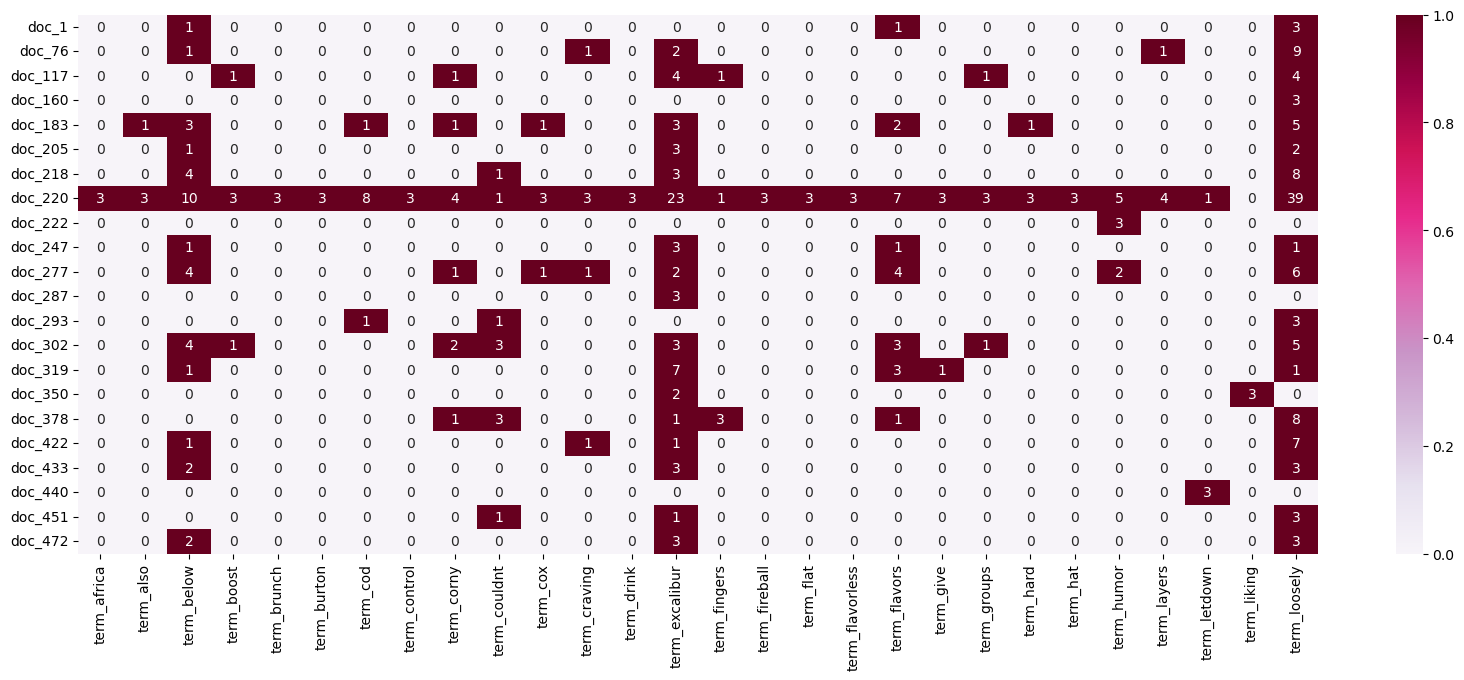

In [76]:
idx_arg = np.argwhere(sentiment_counts[:,:500].toarray()>2) # find where is bigger than 2
idx_arg_x = np.unique(idx_arg[:,0])  #to make unique elements of an array
idx_arg_y = (np.unique(idx_arg[:,1]))

plot_x = ["term_"+str(i) for i in count_vect_new.get_feature_names_out()[idx_arg_x]]

plot_y = ["doc_"+ str(i) for i in np.array((sentiment.index))[idx_arg_y]]
plot_z = np.array([[sentiment_counts[i:i+1,j:j+1].toarray()[0,0]for i in idx_arg_x] for j in idx_arg_y])#X_counts cannot for specific index, I just can use this method to let it can get specific index 
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

display(df_todraw)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [77]:
print(sentiment_counts.shape)
sentiment_reduced = PCA(n_components = 2).fit_transform(sentiment_counts.toarray())
print(sentiment_reduced.shape)

(2714, 5153)
(2714, 2)


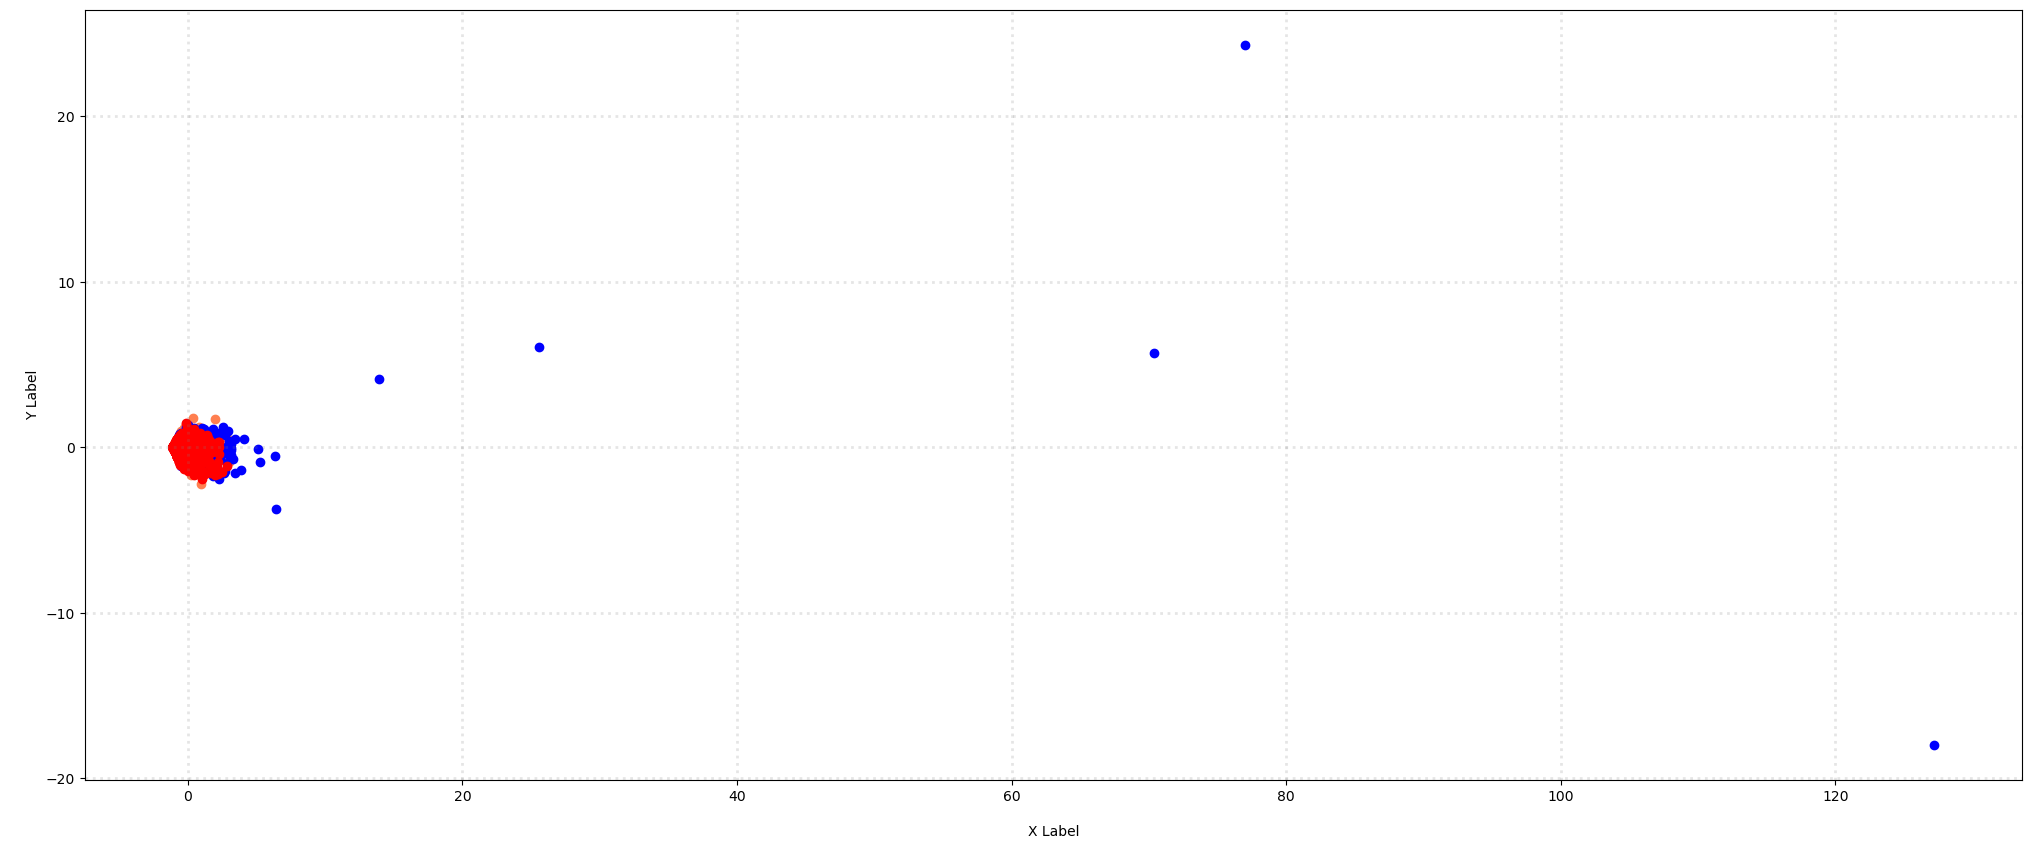

In [78]:
col = ['coral', 'blue','red']
categories = ['amazon','imdb','yelp']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = sentiment_reduced[sentiment['company'] == category].T[0]
    ys = sentiment_reduced[sentiment['company'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):

(2714, 3)


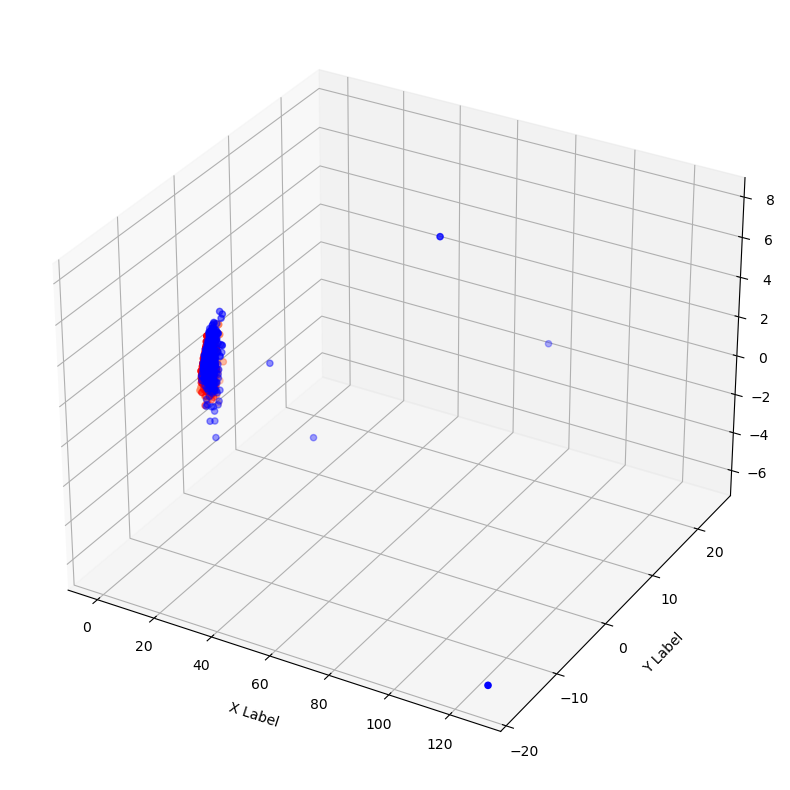

In [79]:
sentiment_reduced = PCA(n_components = 3).fit_transform(sentiment_counts.toarray())

col = ['coral', 'blue', 'red']
print(sentiment_reduced.shape)
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = sentiment_reduced[sentiment['company'] == category].T[0]
    ys = sentiment_reduced[sentiment['company'] == category].T[1]
    zs = sentiment_reduced[sentiment['company'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [80]:
term_frequencies_new = []
print(sentiment_counts.shape[1])
for j in range(0,sentiment_counts.shape[1]):
    term_frequencies_new.append(sum(sentiment_counts[:,j].toarray()))

5153


In [81]:
term_frequencies_new = np.asarray(sentiment_counts.sum(axis=0))[0]

In [82]:
term_frequencies[1] #sum of first term: 10

92

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


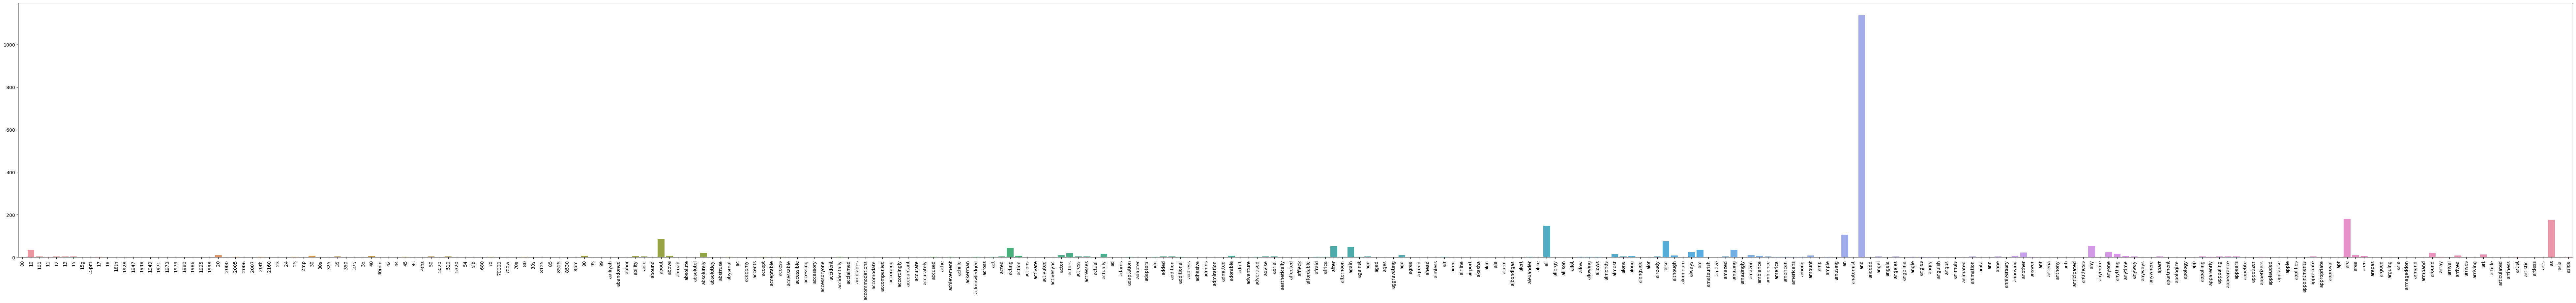

In [83]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new.get_feature_names_out()[:300], 
            y=term_frequencies_new[:300])
g.set_xticklabels(count_vect_new.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 13 (take home):**

[Text(0, 0, 'for'),
 Text(1, 0, 'in'),
 Text(2, 0, 'of'),
 Text(3, 0, 'was'),
 Text(4, 0, 'this'),
 Text(5, 0, 'and'),
 Text(6, 0, 'it'),
 Text(7, 0, 'to'),
 Text(8, 0, 'is'),
 Text(9, 0, 'the')]

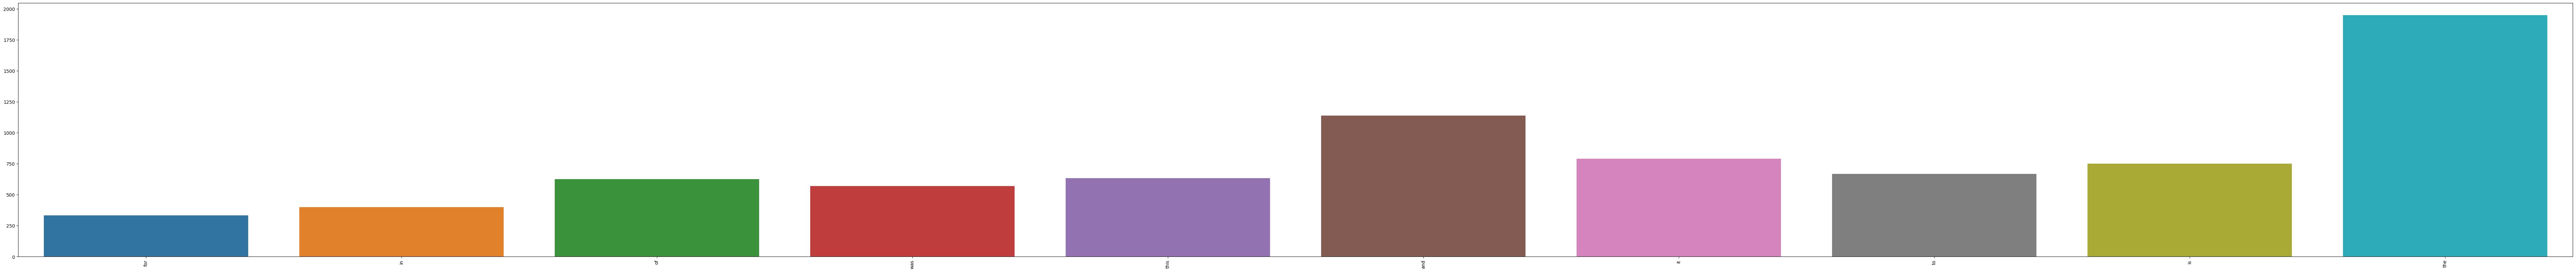

In [84]:
ind = np.argpartition(term_frequencies_new,-10)[-10:] #to get 10 bigest elements from array
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new.get_feature_names_out()[ind], 
            y=term_frequencies_new[ind])
g.set_xticklabels(count_vect_new.get_feature_names_out()[ind], rotation = 90)

### >>> **Exercise 14 (take home):**

[Text(0, 0, 'all'),
 Text(1, 0, 'an'),
 Text(2, 0, 'and'),
 Text(3, 0, 'are'),
 Text(4, 0, 'as'),
 Text(5, 0, 'at'),
 Text(6, 0, 'bad'),
 Text(7, 0, 'be'),
 Text(8, 0, 'but'),
 Text(9, 0, 'film'),
 Text(10, 0, 'food'),
 Text(11, 0, 'for'),
 Text(12, 0, 'from'),
 Text(13, 0, 'good'),
 Text(14, 0, 'great'),
 Text(15, 0, 'had'),
 Text(16, 0, 'have'),
 Text(17, 0, 'if'),
 Text(18, 0, 'in'),
 Text(19, 0, 'is'),
 Text(20, 0, 'it'),
 Text(21, 0, 'just'),
 Text(22, 0, 'like'),
 Text(23, 0, 'movie'),
 Text(24, 0, 'my'),
 Text(25, 0, 'not'),
 Text(26, 0, 'of'),
 Text(27, 0, 'on'),
 Text(28, 0, 'one'),
 Text(29, 0, 'phone'),
 Text(30, 0, 'place'),
 Text(31, 0, 'really'),
 Text(32, 0, 'service'),
 Text(33, 0, 'so'),
 Text(34, 0, 'that'),
 Text(35, 0, 'the'),
 Text(36, 0, 'there'),
 Text(37, 0, 'they'),
 Text(38, 0, 'this'),
 Text(39, 0, 'time'),
 Text(40, 0, 'to'),
 Text(41, 0, 'very'),
 Text(42, 0, 'was'),
 Text(43, 0, 'we'),
 Text(44, 0, 'were'),
 Text(45, 0, 'with'),
 Text(46, 0, 'you')]

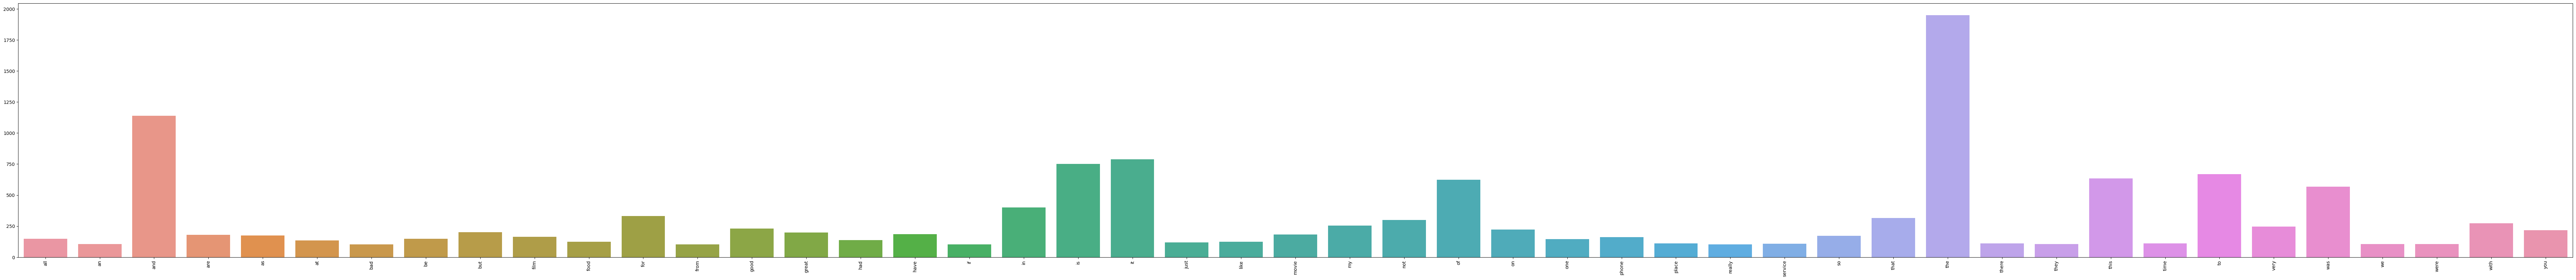

In [85]:
ind = np.where(term_frequencies_tv>100) # find where are more than 100
ind = ind[:100]   #get 100 datas where are more than 100
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new.get_feature_names_out()[ind], #plot new data set 
            y=term_frequencies_new[ind])
g.set_xticklabels(count_vect_new.get_feature_names_out()[ind], rotation = 90)

### >>> **Exercise 15 (take home):**

[Text(0, 0, 'the'),
 Text(1, 0, 'and'),
 Text(2, 0, 'it'),
 Text(3, 0, 'is'),
 Text(4, 0, 'to'),
 Text(5, 0, 'this'),
 Text(6, 0, 'of'),
 Text(7, 0, 'was'),
 Text(8, 0, 'in'),
 Text(9, 0, 'for'),
 Text(10, 0, 'that'),
 Text(11, 0, 'not'),
 Text(12, 0, 'with'),
 Text(13, 0, 'my'),
 Text(14, 0, 'very'),
 Text(15, 0, 'good'),
 Text(16, 0, 'on'),
 Text(17, 0, 'you'),
 Text(18, 0, 'but'),
 Text(19, 0, 'great'),
 Text(20, 0, 'have'),
 Text(21, 0, 'movie'),
 Text(22, 0, 'are'),
 Text(23, 0, 'as'),
 Text(24, 0, 'so'),
 Text(25, 0, 'film'),
 Text(26, 0, 'phone'),
 Text(27, 0, 'all'),
 Text(28, 0, 'be'),
 Text(29, 0, 'one'),
 Text(30, 0, 'had'),
 Text(31, 0, 'at'),
 Text(32, 0, 'food'),
 Text(33, 0, 'like'),
 Text(34, 0, 'just'),
 Text(35, 0, 'time'),
 Text(36, 0, 'there'),
 Text(37, 0, 'place'),
 Text(38, 0, 'service'),
 Text(39, 0, 'they'),
 Text(40, 0, 'an'),
 Text(41, 0, 'were'),
 Text(42, 0, 'we'),
 Text(43, 0, 'bad'),
 Text(44, 0, 'really'),
 Text(45, 0, 'from'),
 Text(46, 0, 'if'),
 Text(

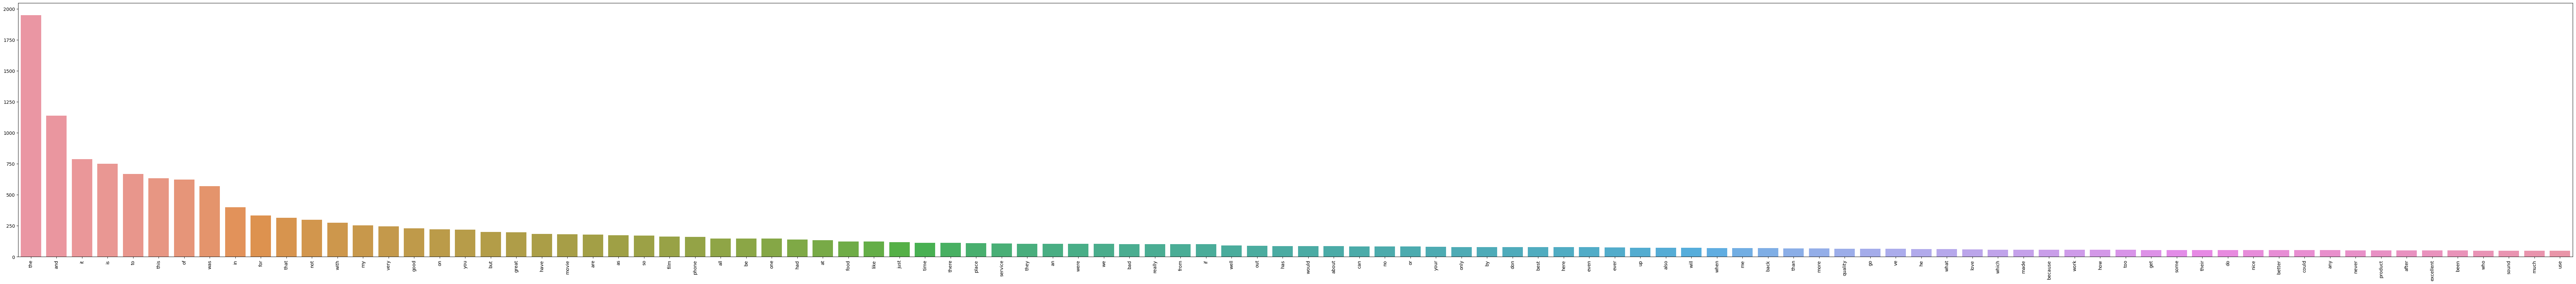

In [86]:
ind_sort = np.argsort(-term_frequencies_new)#sort data and get sorted index 
ind_sort = ind_sort[:100]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new.get_feature_names_out()[ind_sort], 
            y=term_frequencies_new[ind_sort])
g.set_xticklabels(count_vect_new.get_feature_names_out()[ind_sort], rotation = 90)

In [87]:
import math
term_frequencies_log_new = [math.log(i) for i in term_frequencies_new]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


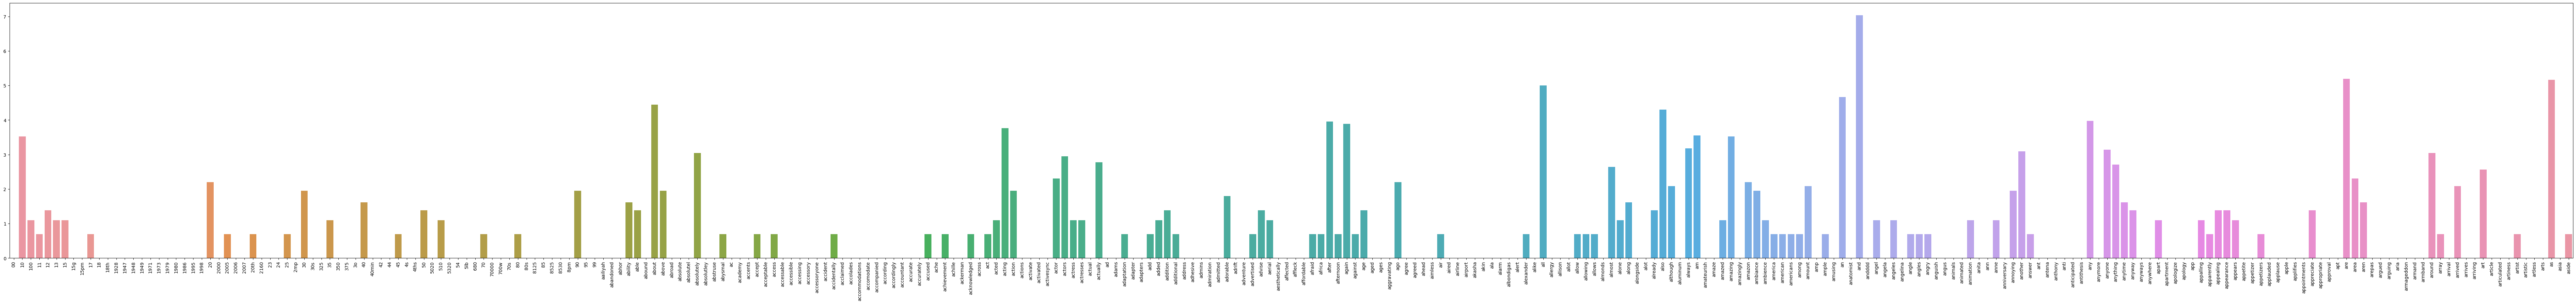

In [88]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new.get_feature_names_out()[:300],
                y=term_frequencies_log_new[:300])
g.set_xticklabels(count_vect_new.get_feature_names_out()[:300], rotation = 90)

### 5.6 Discretization and Binarization

In [89]:
mlb_new = preprocessing.LabelBinarizer()
mlb.fit(sentiment.company)

LabelBinarizer()

In [90]:
sentiment['bin_category'] = mlb.transform(sentiment['company']).tolist()

In [91]:
sentiment[0:9]

,sentence,score,company,unigrams,bin_category
0,They keep getting better and better (this is m...,1.0,amazon,"[They, keep, getting, better, and, better, (, ...","[1, 0, 0]"
1,I would definitely recommend the wings as well...,1.0,yelp,"[I, would, definitely, recommend, the, wings, ...","[0, 0, 1]"
2,I was looking for this headset for a long time...,1.0,amazon,"[I, was, looking, for, this, headset, for, a, ...","[1, 0, 0]"
3,Any ring tone..Overall good phone to buy..,1.0,amazon,"[Any, ring, tone, .., Overall, good, phone, to...","[1, 0, 0]"
4,I knew when I saw the film that more great thi...,1.0,imdb,"[I, knew, when, I, saw, the, film, that, more,...","[0, 1, 0]"
5,The sound quality is good and functionality is...,1.0,amazon,"[The, sound, quality, is, good, and, functiona...","[1, 0, 0]"
6,Good beer & drink selection and good food sele...,1.0,yelp,"[Good, beer, &, drink, selection, and, good, f...","[0, 0, 1]"
7,"If you see it, you should probably just leave ...",0.0,imdb,"[If, you, see, it, ,, you, should, probably, j...","[0, 1, 0]"
8,":) Anyway, the plot flowed smoothly and the ma...",1.0,imdb,"[:, ), Anyway, ,, the, plot, flowed, smoothly,...","[0, 1, 0]"


# 6. Data Exploration

In [92]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = sentiment.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sentiment.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sentiment.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [93]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Not good by any stretch of the imagination.']
['For the price this was a great deal.']
["Don't trust their website and don't expect any helpful support."]


In [94]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect_new.transform(document_to_transform_1)
document_vector_count_2 = count_vect_new.transform(document_to_transform_2)
document_vector_count_3 = count_vect_new.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [95]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.133631
Cosine Similarity using count bw 1 and 3: 0.102062
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# 3. Third: please attempt the following tasks on **the new dataset**.
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

### 1 Gernerate meaningful **new data visualization**

#### 1.1 donut chart

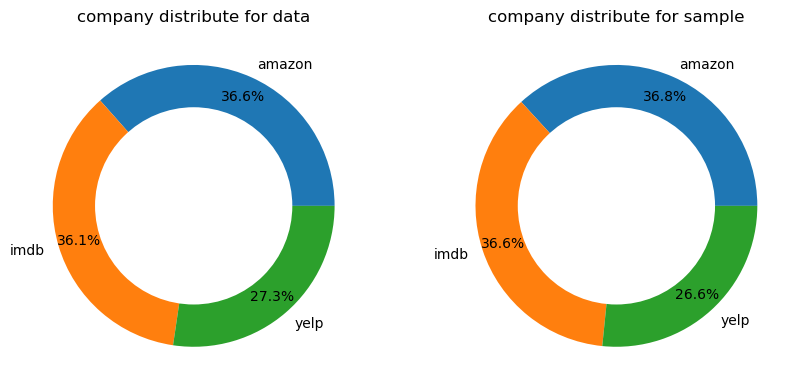

In [96]:
# the new dataset is combined three company datas
# I use donut chart to visual new data distributed in three company
fig, ax = plt.subplots(1, 2, figsize=(10,7))

ax[0].pie(sentiment.company.value_counts(),
        labels = categories,
        radius=1.0,
        autopct='%.1f%%',
        pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

ax[0].add_artist(centre_circle)

ax[0].set_title('company distribute for data')

ax[1].pie(sentiment_sample.company.value_counts(),
        labels = categories,
        radius=1.0,
        autopct='%.1f%%',
        pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

ax[1].add_artist(centre_circle)

ax[1].set_title('company distribute for sample')
plt.show()

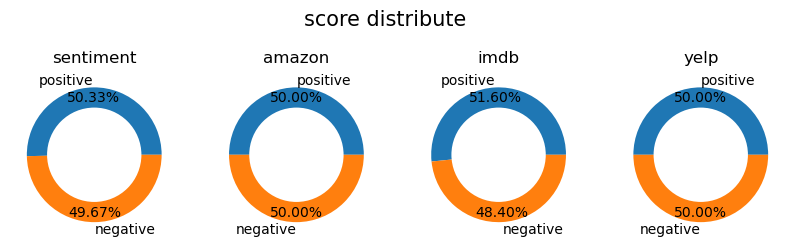

In [97]:
# from the website where to get data, we know score 1 is positive and 0 is negative
score_labeled = ['positive','negative']

#blow I want to plot 4 donut chart to show the score ditribute for each data and combined one
fig, ax = plt.subplots(1, 4, figsize=(10,3))

#first is combined one, second is amazon_cells, third is imdb, fourth is yelp

 #draw circle to make pie chart to donut

for i ,j in enumerate([sentiment,amazon_cells,imdb,yelp]):
    #plot pie chart
    ax[i].pie(j.score.value_counts(), 
            labels = score_labeled,
            radius=1.0,
            autopct='%.2f%%',
            pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')

    ax[i].add_artist(centre_circle) #adding circle in pie chart

#add title
ax[0].set_title('sentiment') 
ax[1].set_title('amazon') 
ax[2].set_title('imdb') 
ax[3].set_title('yelp') 

plt.suptitle('score distribute',fontsize = 15)

plt.show()

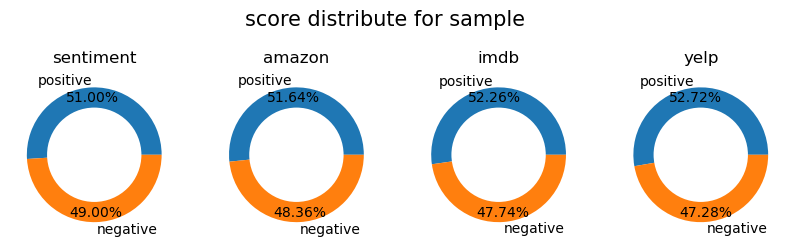

In [98]:
#blow I want to plot 4 donut chart to show the score ditribute for each data and combined one
fig, ax = plt.subplots(1, 4, figsize=(10,3))

#first is combined one, second is amazon_cells, third is imdb, fourth is yelp

centre_circle = plt.Circle((0, 0), 0.70, fc='white') #draw circle to make pie chart to donut

ax[0].pie(sentiment_sample.score.value_counts(), 
        labels = score_labeled,
        radius=1.0,
        autopct='%.2f%%',
        pctdistance=0.85)

ax[0].add_artist(centre_circle) #adding circle in pie chart

for i ,j in enumerate(['amazon','imdb','yelp']):
    #plot pie chart 
    ax[i+1].pie(sentiment_sample.loc[sentiment_sample['company'] == j].score.value_counts(), 
            labels = score_labeled,
            radius=1.0,
            autopct='%.2f%%',
            pctdistance=0.85)

    centre_circle = plt.Circle((0, 0), 0.70, fc='white') #draw circle

    ax[i+1].add_artist(centre_circle) #adding circle in pie chart

#add title
ax[0].set_title('sentiment') 
ax[1].set_title('amazon') 
ax[2].set_title('imdb') 
ax[3].set_title('yelp') 

plt.suptitle('score distribute for sample',fontsize = 15)

plt.show()

#### 2. Generate **TF-IDF features** from the tokens of each text

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
tv = TfidfVectorizer()

#because TF-IDF is used to text data, we fit sentence to TF-IDF
sentiment_tv = tv.fit_transform(sentiment.sentence)

#find where is not zero
ind = np.argwhere(sentiment_tv != 0)
print(ind)

#show the matrix
sentiment_tv[:5,210:220].toarray()

[[   0  216]
 [   0  467]
 [   0 1955]
 ...
 [2712 4529]
 [2712 4607]
 [2713 2222]]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1885202 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10903613, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

from above matrix we can find value in matrix is between 0 to 1. In the document about TD-IDF say $ idf(t)=log(D/1+df(d,t)+1) $ t is term, df is number of documents there the t appears and D is Total number of ducuments available. tf is term frequncy in document. TD-IDF is $TD-IDF = td*idf$ 

In [101]:
# first twenty features only
plot_x = ["term_"+str(i) for i in tv.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [102]:
plot_y = ["doc_"+ str(i) for i in list(sentiment.index)[210:230]]

In [103]:
plot_z = sentiment_tv[:20, 210:230].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0.         0.         0.         0.         0.         0.
  0.1885202  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.10903613 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_214,0.0,0.0,0.0,0.0,0.0,0.0,0.188520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_215,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_216,0.0,0.0,0.0,0.0,0.0,0.0,0.109036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_217,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_218,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_219,0.0,0.0,0.0,0.0,0.0,0.0,0.154386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_220,0.0,0.0,0.0,0.0,0.0,0.0,0.114295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_221,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_222,0.0,0.0,0.0,0.0,0.0,0.0,0.096550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_223,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


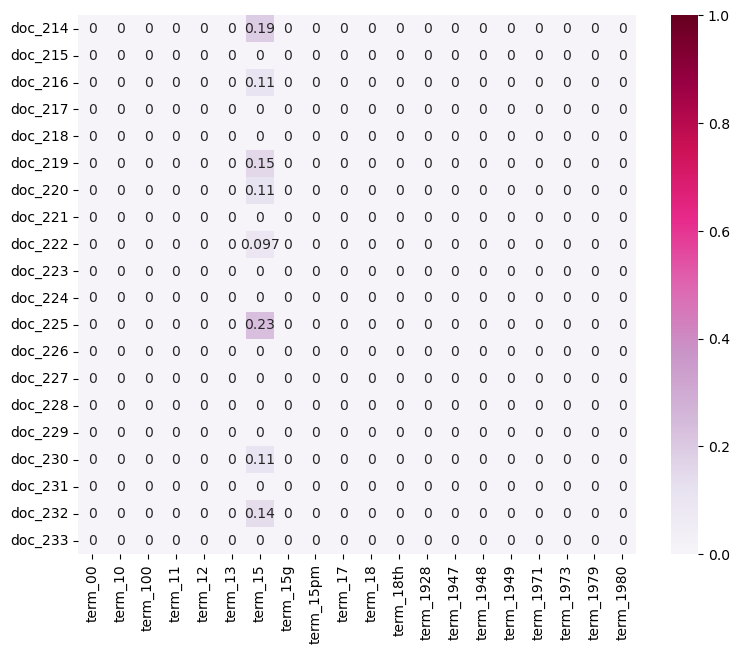

In [104]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))

ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 3. Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories

In [115]:
from sklearn.naive_bayes import MultinomialNB

#create model
mnb = MultinomialNB()

#train data is 75% and test data is 25%
split = int(0.75*len(sentiment.index))

#creat data
text_vec = pd.DataFrame(sentiment_counts.toarray(), columns=count_vect_new.get_feature_names_out())

# train mnb model
mnb.fit(text_vec[:split],sentiment['score'][:split])

#predict train data
pred = mnb.predict(text_vec[:split])
target = np.array(sentiment['score'][:split])
accuracy = np.sum(pred == target)/len(sentiment['score'][:split])
print("accuracy for train data is ", accuracy)

#predict test data
pred = mnb.predict(text_vec[split:])
target = np.array(sentiment['score'][split:])
accuracy = np.sum(pred == target)/len(sentiment['score'][split:])
print("accuracy for test data is ", accuracy)

accuracy for train data is  0.9474201474201475
accuracy for test data is  0.8232695139911634


In [116]:
#create model
mnb_tv = MultinomialNB()

#creat data
text_vec_tv = pd.DataFrame(sentiment_tv.toarray(), columns=tv.get_feature_names_out())

# train mnb model
mnb_tv.fit(text_vec_tv[:split],sentiment['score'][:split])

#predict train data
pred_tv = mnb_tv.predict(text_vec_tv[:split])
target_tv = np.array(sentiment['score'][:split])
accuracy_tv = np.sum(pred_tv == target_tv)/len(sentiment['score'][:split])
print("accuracy for train data is ", accuracy_tv)

#predict test data
pred_tv = mnb_tv.predict(text_vec_tv[split:])
target_tv = np.array(sentiment['score'][split:])
accuracy_tv = np.sum(pred_tv == target_tv)/len(sentiment['score'][split:])
print("accuracy for test data is ", accuracy_tv)

accuracy for train data is  0.9567567567567568
accuracy for test data is  0.8203240058910162


Above I use multinomial to train wrod frequency and TD-IDF because data have many term. 

We can find **TD-IDF** accuracy for **train data** is **higher** than **word frequency** but **test data for TD-IDF is worse**. 

Accuracy between two features are close. Maybe number of score just 2 cause this result. It just need to separate feature to two score.

# 4. discussion

In the lab it often use function to get terms, name and other, we can just use array to store data. When we want to use it and we do not call the function again.

Method preprocessing.LabelBinarizer for new data because score is just 0 or 1, this is not useful for new data's score. So I apply **company** to new data to use try this method.

For self data, sklearn is diffucult to load so use pandas to load self data.

To reduce duplicate data, idex will not change. If we use index to call specific value in matrix, it probably encounter problem.